# Avacado Project

### Problem Statement:

Avocado is a fruit consumed by people heavily in the United States.

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [29]:
df.shape

(18249, 14)

Unnamed column seems to be no use so dropping the column

### Sampling the - Above Dataset as it has huge Rows count

In [6]:
# generating one row 
rows = df.sample(frac =.25)

In [7]:
# checking if sample is 0.25 times data or not
if (0.25*(len(df))== len(rows)):
    print( "Frame")
    print(len(df), len(rows))

In [8]:
df.columns.value_counts().sum()

14

so we have total 13 columns in the Dataset

In [9]:
rows.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10452,26,28-06-2015,1.62,67201.29,7894.13,35220.02,4380.25,19706.89,12921.08,6785.81,0.00,organic,2015,Midsouth
5503,43,28-02-2016,0.91,36801817.68,11907394.72,13210854.56,1560167.75,10123400.65,7251666.99,2802238.74,69494.92,conventional,2016,TotalUS
10949,3,06-12-2015,1.92,21986.87,2915.26,13652.88,368.09,5050.64,3518.24,1532.40,0.00,organic,2015,Plains
10731,45,15-02-2015,1.87,7199.17,7.88,590.77,0.00,6600.52,6600.52,0.00,0.00,organic,2015,NorthernNewEngland
11820,42,08-03-2015,1.49,783913.05,253078.17,327972.28,5658.70,197203.90,169302.64,27901.26,0.00,organic,2015,TotalUS


so we have generated the 25% Sample of the above data which can be used for further Analysis

In [10]:
rows.shape

(4562, 14)

# checking for null values

In [13]:
rows.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

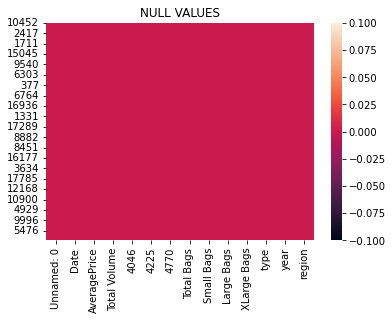

In [14]:
sns.heatmap(rows.isnull())
plt.title('NULL VALUES')
plt.show()

So we have no null values in these dataset

In [15]:
rows.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,4562.000000,4562.000000,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4562.000000,4562.000000
mean,24.259316,1.405129,8.571566e+05,2.944243e+05,2.952037e+05,2.274592e+04,2.447805e+05,1.850387e+05,5.664550e+04,3096.306833,2016.154757
std,15.599784,0.407101,3.426857e+06,1.259615e+06,1.175575e+06,1.037353e+05,9.936981e+05,7.491286e+05,2.502414e+05,17139.322237,0.945656
min,0.000000,0.440000,5.309600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.090000,1.108075e+04,8.791650e+02,3.233680e+03,0.000000e+00,5.115255e+03,2.803580e+03,1.454875e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.043147e+05,8.074950e+03,2.825275e+04,1.732500e+02,3.885934e+04,2.522800e+04,2.808645e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.356820e+05,1.109550e+05,1.483701e+05,6.094330e+03,1.128402e+05,8.554566e+04,2.257354e+04,112.260000,2017.000000
max,52.000000,3.120000,4.465546e+07,1.893304e+07,1.895648e+07,1.800066e+06,1.597249e+07,1.171281e+07,4.023485e+06,390478.730000,2018.000000


so we can see that the dataset has high Std deviation between the data as we have high Std deviation at the column in Small bags Large Bags and X large Bags

As there is also the high chances that where the deviation is high there might be the also asymeteric or skewed

### Checking for the Datatypes

In [16]:
rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4562 entries, 10452 to 9310
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4562 non-null   int64  
 1   Date          4562 non-null   object 
 2   AveragePrice  4562 non-null   float64
 3   Total Volume  4562 non-null   float64
 4   4046          4562 non-null   float64
 5   4225          4562 non-null   float64
 6   4770          4562 non-null   float64
 7   Total Bags    4562 non-null   float64
 8   Small Bags    4562 non-null   float64
 9   Large Bags    4562 non-null   float64
 10  XLarge Bags   4562 non-null   float64
 11  type          4562 non-null   object 
 12  year          4562 non-null   int64  
 13  region        4562 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 534.6+ KB


we have 3 categeorical variables in the dataset
Date
type
region

The goal is to predict the average cost of the avocado which is continuous in nature for different types

In this dataset most of the columns are float type in nature

Date,type,region are categeorical in Nature

In [19]:
# columns in dataset
rows.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [21]:
# unique elements in each of the columns
rows.nunique()

Unnamed: 0        53
Date             169
AveragePrice     234
Total Volume    4560
4046            4481
4225            4544
4770            3147
Total Bags      4553
Small Bags      4431
Large Bags      3857
XLarge Bags     1478
type               2
year               4
region            54
dtype: int64

# Exploration of the Dataset (EDA)

In [22]:
rows['type'].value_counts()

organic         2297
conventional    2265
Name: type, dtype: int64

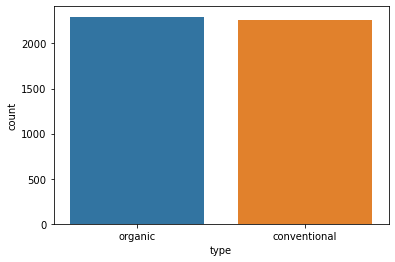

In [23]:
sns.countplot(rows.type)
plt.show()

In [24]:
rows['year'].value_counts()

2017    1457
2015    1411
2016    1364
2018     330
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

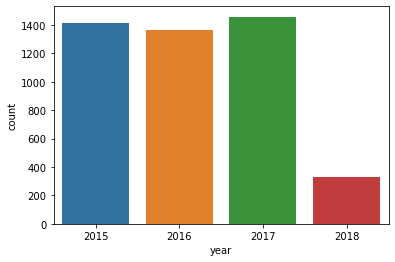

In [25]:
# Visualization of year value counts
sns.countplot(rows.year)

In 2018 there is very much less data compared to other years

In [26]:
rows['region'].value_counts()

Plains                 100
Midsouth                98
Indianapolis            97
MiamiFtLauderdale       97
Northeast               97
Columbus                95
BuffaloRochester        95
Denver                  93
Philadelphia            93
Louisville              93
RichmondNorfolk         92
LasVegas                91
SouthCentral            91
Spokane                 90
BaltimoreWashington     90
Nashville               88
TotalUS                 88
Charlotte               88
Portland                87
California              86
Boise                   86
Seattle                 86
Houston                 85
NewOrleansMobile        85
CincinnatiDayton        85
Chicago                 84
LosAngeles              84
Atlanta                 84
Orlando                 84
Boston                  84
Albany                  83
WestTexNewMexico        83
StLouis                 82
Detroit                 82
Sacramento              82
Pittsburgh              82
PhoenixTucson           81
H

<AxesSubplot:xlabel='region'>

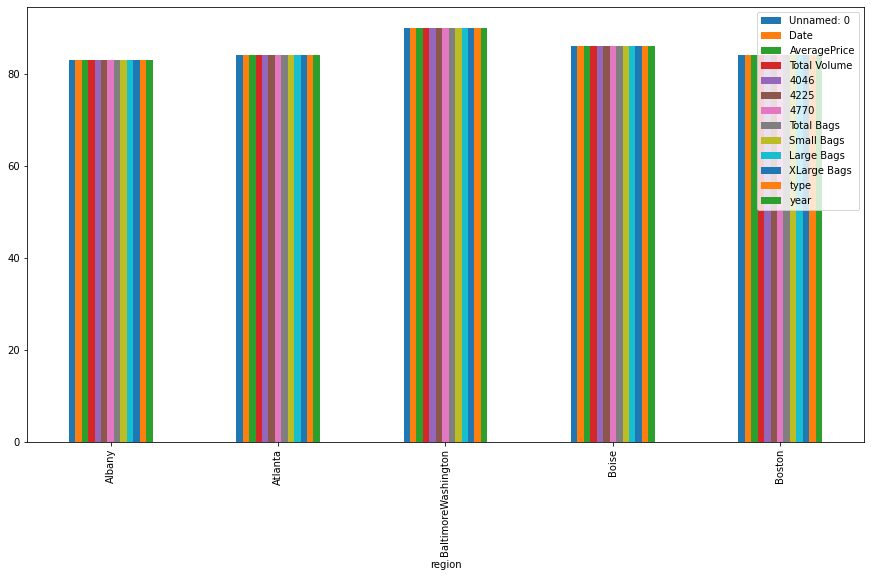

In [27]:
rows.groupby(['region']).count().head().plot(kind='bar', figsize=(15,8))

### First 25 regions

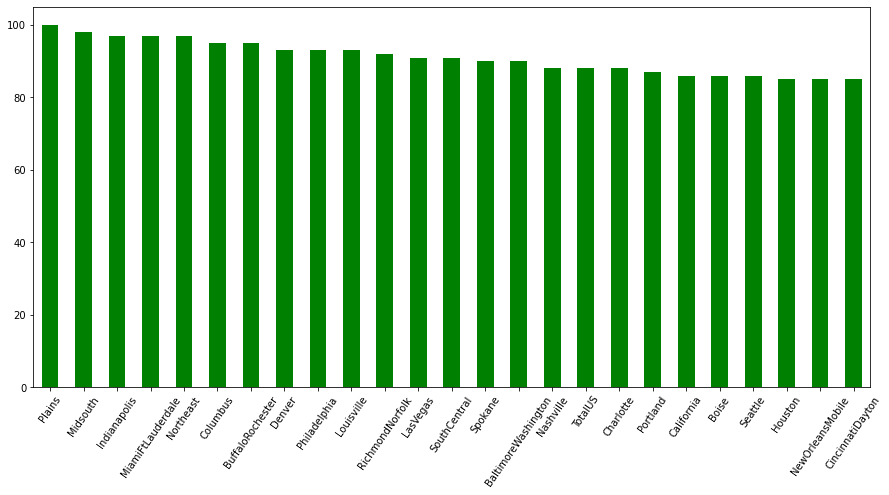

In [33]:
plt.figure(figsize=(15,7))
rows.region.value_counts(ascending = False).head(25).plot(kind = 'bar', color='g')
plt.xticks(rotation = 55);

In the first 25 we can see that the plains has the highest region where avacado is popular

### Rest more regions

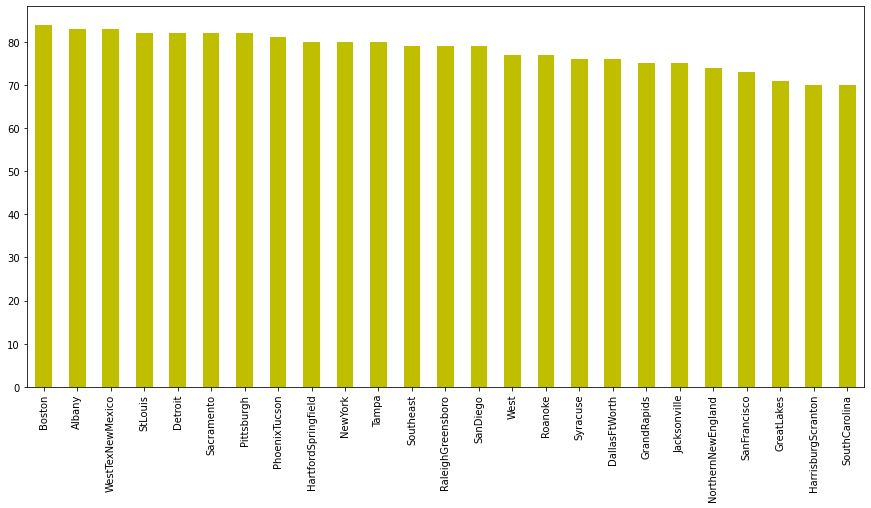

In [39]:
plt.figure(figsize=(15,7))
rows.region.value_counts(ascending = False).tail(25).plot(kind = 'bar', color='y')
plt.xticks(rotation = 90);

HarrisburgScranton and SouthCarolina is the region where avacado is less popular

Type has 2 unique values (conventional, organic)

Year has 4 unique values which are of discrete type(2015,2016,2017,2018)

Region has 54 unique values

In [40]:
rows.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10452,26,28-06-2015,1.62,67201.29,7894.13,35220.02,4380.25,19706.89,12921.08,6785.81,0.00,organic,2015,Midsouth
5503,43,28-02-2016,0.91,36801817.68,11907394.72,13210854.56,1560167.75,10123400.65,7251666.99,2802238.74,69494.92,conventional,2016,TotalUS
10949,3,06-12-2015,1.92,21986.87,2915.26,13652.88,368.09,5050.64,3518.24,1532.40,0.00,organic,2015,Plains
10731,45,15-02-2015,1.87,7199.17,7.88,590.77,0.00,6600.52,6600.52,0.00,0.00,organic,2015,NorthernNewEngland
11820,42,08-03-2015,1.49,783913.05,253078.17,327972.28,5658.70,197203.90,169302.64,27901.26,0.00,organic,2015,TotalUS


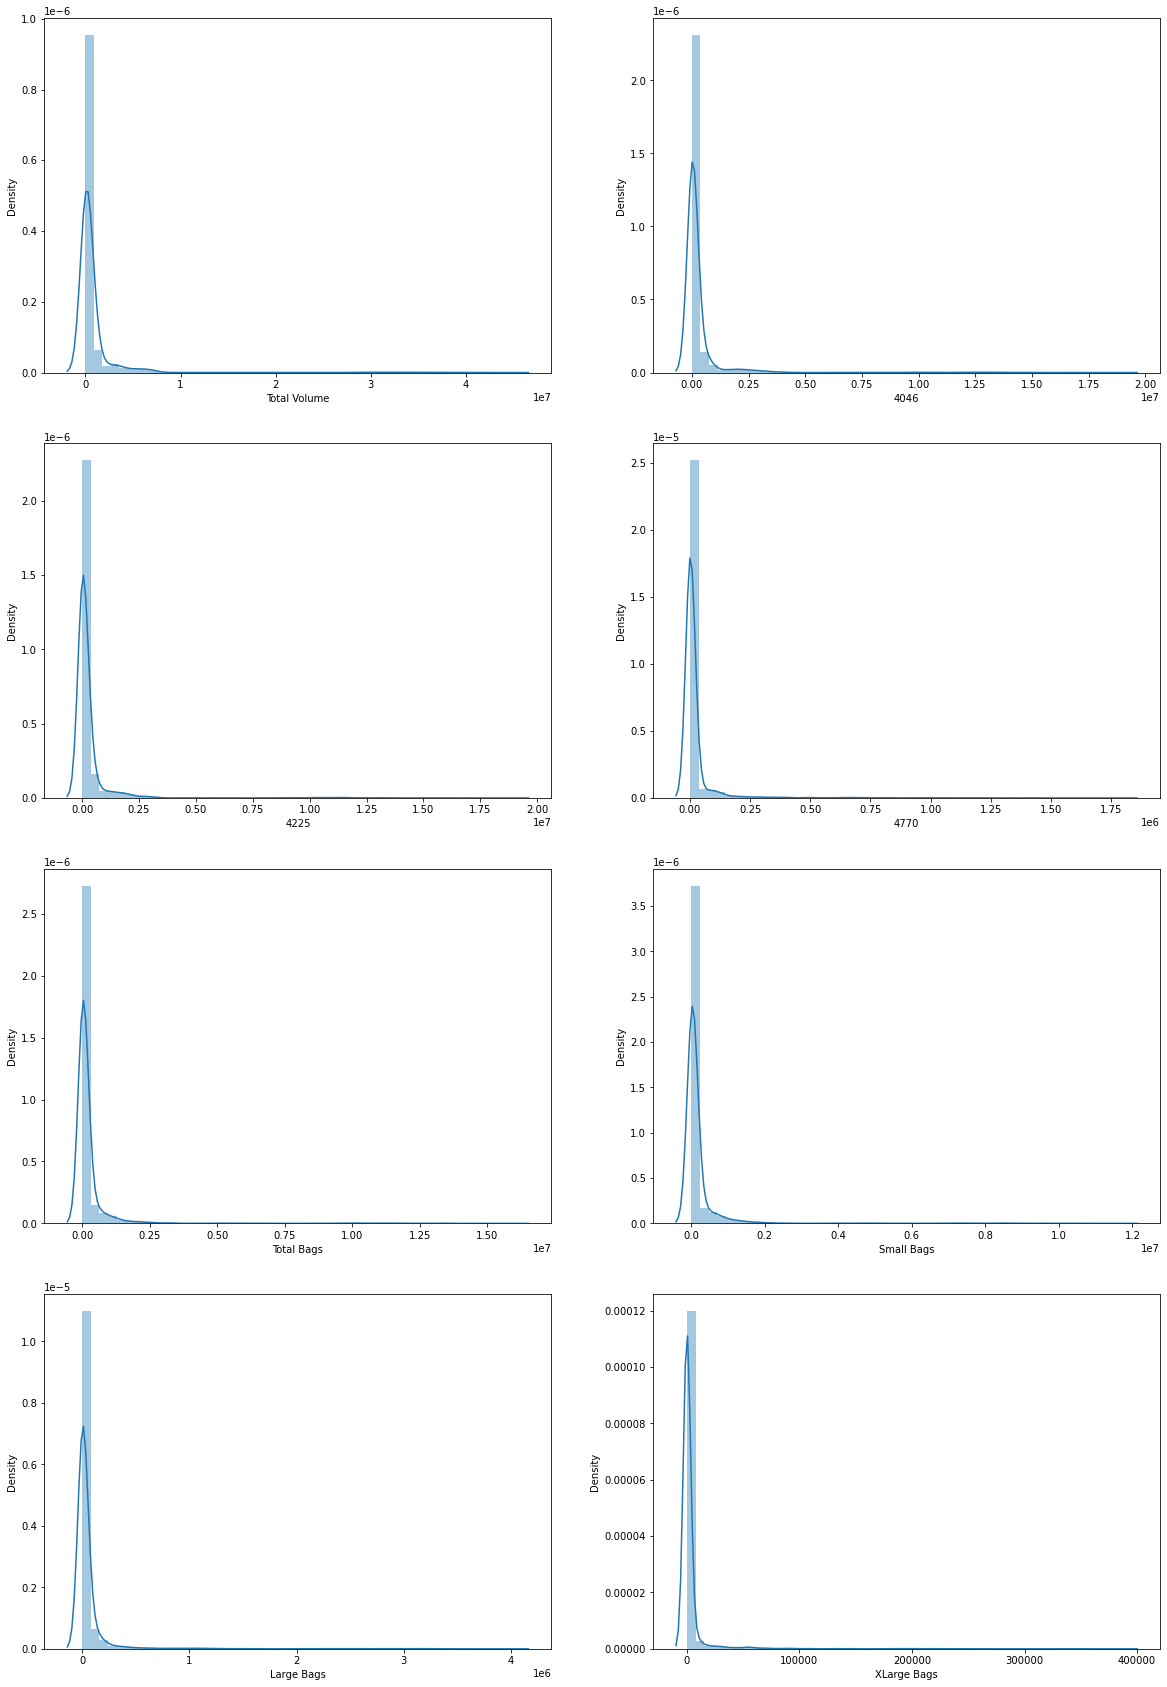

In [42]:
num_cols = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
plt.figure(figsize=(20,30))
plotnum = 1
for i in num_cols:
    if plotnum <=10:
        plt.subplot(4,2,plotnum)
        sns.distplot(rows[i])
        plt.xlabel(i,fontsize=10)
    plotnum+=1
plt.show()

Total Volume,4046,4225,4770 has the binomial distribution.
Total Bags,Small bags,Large Bags, XLarge Bags has the skewness presentin it.

## Comparision of year and 4046,4225,4770

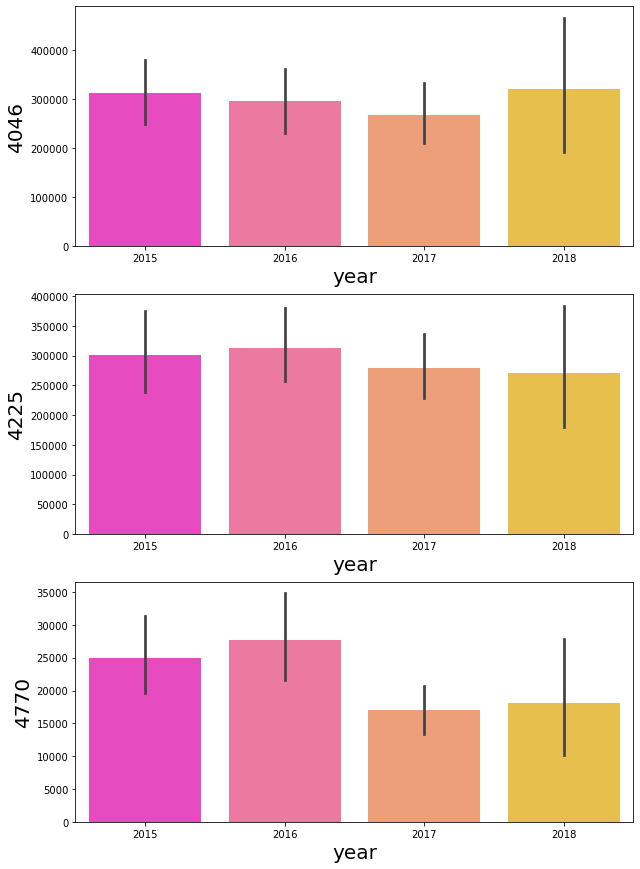

In [47]:
y_cols = rows[['4046','4225','4770']]
x_cols = rows['year']
plt.figure(figsize=(10,15),facecolor='w', edgecolor='b')
plotnum = 1
for cols in y_cols:
    plt.subplot(3,1,plotnum)
    sns.barplot(x_cols,y_cols[cols], palette='spring')
    plt.xlabel('year',fontsize=20)
    plt.ylabel(cols,fontsize=20)
    plotnum+=1
plt.show()

PLU 4046 has grown over the 4 years

compared to PLU-4225 production PLU-4046 is more

PLU-4770 is least produced

## Comparision of different PLU's and type

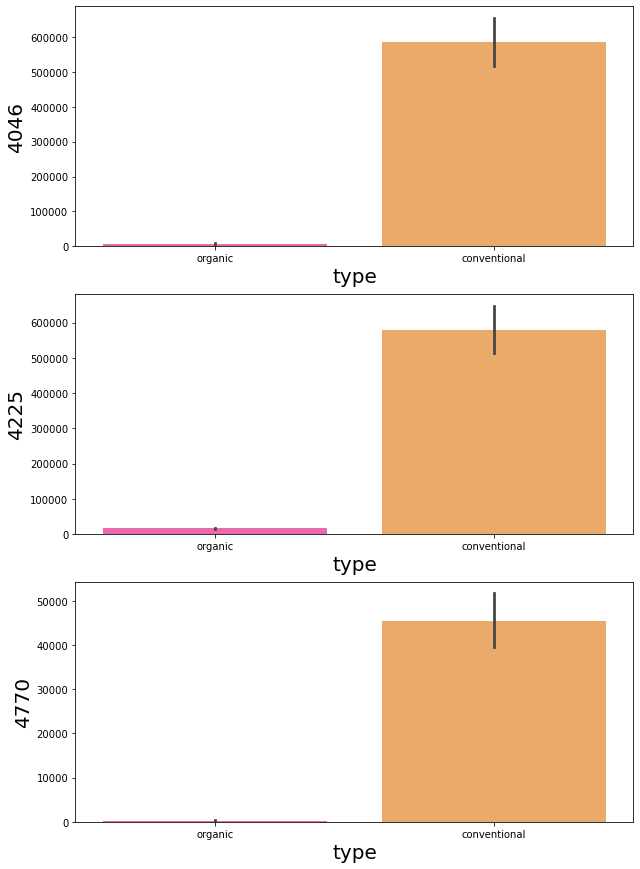

In [49]:
y_cols = rows[['4046','4225','4770']]
x_cols = rows['type']
plt.figure(figsize=(10,15),facecolor='white')
plotnum = 1
for cols in y_cols:
    plt.subplot(3,1,plotnum)
    sns.barplot(x_cols,y_cols[cols], palette='spring')
    plt.xlabel('type',fontsize=20)
    plt.ylabel(cols,fontsize=20)
    plotnum+=1
plt.show()

Production of conventional_type is more in cases 4046,4225,4770.
By this we can say less production high demand the organic rates we can assume as higher

## Comparision of average prices in different years

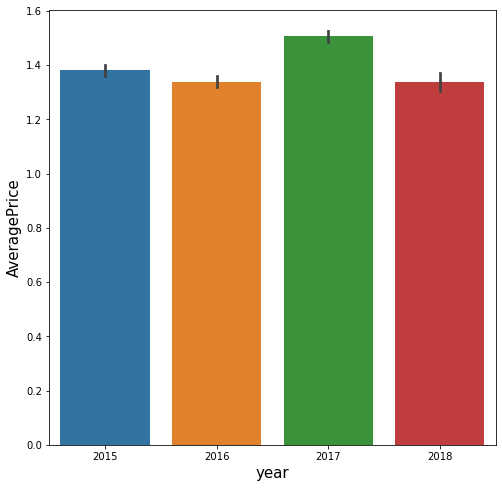

In [50]:
y_cols = rows['AveragePrice']
x_cols = rows[['year']]
plt.figure(figsize=(8,8),facecolor='white')
plotnum = 1
for cols in x_cols:
    plt.subplot(1,1,plotnum)
    sns.barplot(x_cols[cols],y_cols)
    plt.xlabel(cols,fontsize=15)
    plt.ylabel('AveragePrice',fontsize=15)
    plotnum+=1
plt.show()

From this graph we can say that there is more avarage price in 2017 years

<AxesSubplot:xlabel='year'>

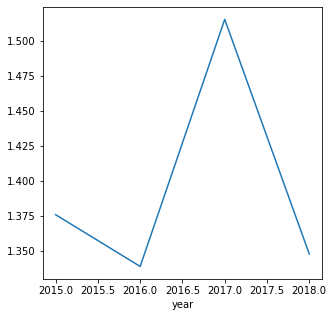

In [51]:
plt.figure(figsize=(5,5))
df.groupby('year')['AveragePrice'].mean().plot(kind='line')

There is some dip in AveragePrice in 2016 and hike in AveragePrice in 2017

In [52]:
# Values of the year and average price
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [53]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

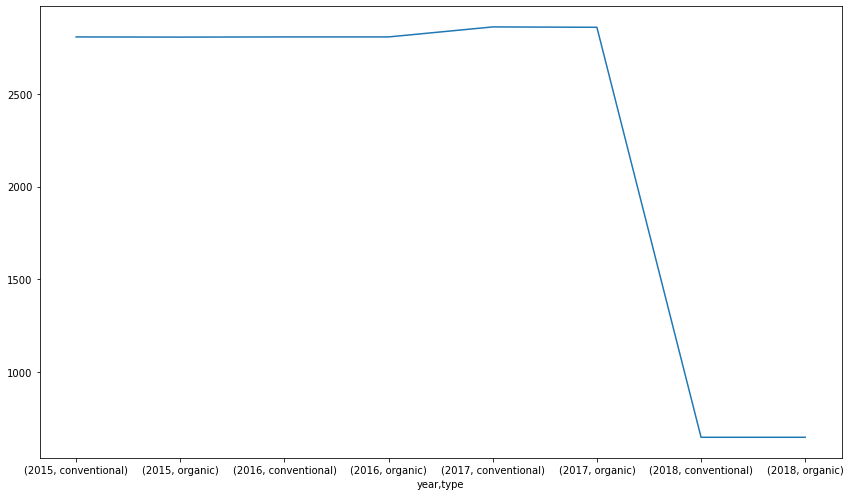

In [54]:
plt.figure(figsize=(12,7))
df.groupby('year')['type'].value_counts().plot()
plt.tight_layout()

2018 there is less production in convetional and organic types

### Extracting Date and Month from Date feature not creating year because it is already present in dataset

In [55]:
rows['Date'] = pd.to_datetime(rows['Date'])     # changing the object type to datetime type
rows['Day'] = rows['Date'].apply(lambda d:d.day)# Extracting the date and adding to df
rows['Month'] = rows['Date'].apply(lambda m:m.month)#Extracting month and adding to df

In [56]:
rows.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
10452,26,2015-06-28,1.62,67201.29,7894.13,35220.02,4380.25,19706.89,12921.08,6785.81,0.00,organic,2015,Midsouth,28,6
5503,43,2016-02-28,0.91,36801817.68,11907394.72,13210854.56,1560167.75,10123400.65,7251666.99,2802238.74,69494.92,conventional,2016,TotalUS,28,2
10949,3,2015-06-12,1.92,21986.87,2915.26,13652.88,368.09,5050.64,3518.24,1532.40,0.00,organic,2015,Plains,12,6
10731,45,2015-02-15,1.87,7199.17,7.88,590.77,0.00,6600.52,6600.52,0.00,0.00,organic,2015,NorthernNewEngland,15,2
11820,42,2015-08-03,1.49,783913.05,253078.17,327972.28,5658.70,197203.90,169302.64,27901.26,0.00,organic,2015,TotalUS,3,8


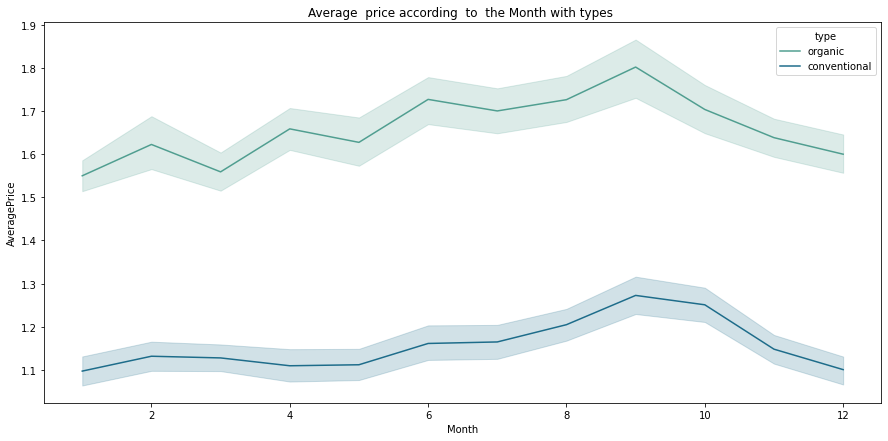

In [57]:
plt.figure(figsize=(15,7),facecolor='white')
sns.lineplot(x='Month',y='AveragePrice', hue = 'type',data=rows, palette='crest')
plt.title('Average  price according  to  the Month with types ')
plt.show()

There is hike in 8-10 th month for both organic and conventional types

### Dropping some of the columns

Observation:

As we observe the sum of 4046,4225,4770,Total Bags is Total Volume Column

The sum of Small Bags,Large Bags,XLarge Bags is Total Bags feature

In [58]:
rows.drop(columns=['Date','Total Volume','Total Bags'],inplace=True,axis=1)
rows.head()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
10452,26,1.62,7894.13,35220.02,4380.25,12921.08,6785.81,0.00,organic,2015,Midsouth,28,6
5503,43,0.91,11907394.72,13210854.56,1560167.75,7251666.99,2802238.74,69494.92,conventional,2016,TotalUS,28,2
10949,3,1.92,2915.26,13652.88,368.09,3518.24,1532.40,0.00,organic,2015,Plains,12,6
10731,45,1.87,7.88,590.77,0.00,6600.52,0.00,0.00,organic,2015,NorthernNewEngland,15,2
11820,42,1.49,253078.17,327972.28,5658.70,169302.64,27901.26,0.00,organic,2015,TotalUS,3,8


In [59]:
rows.columns.value_counts().sum()

13

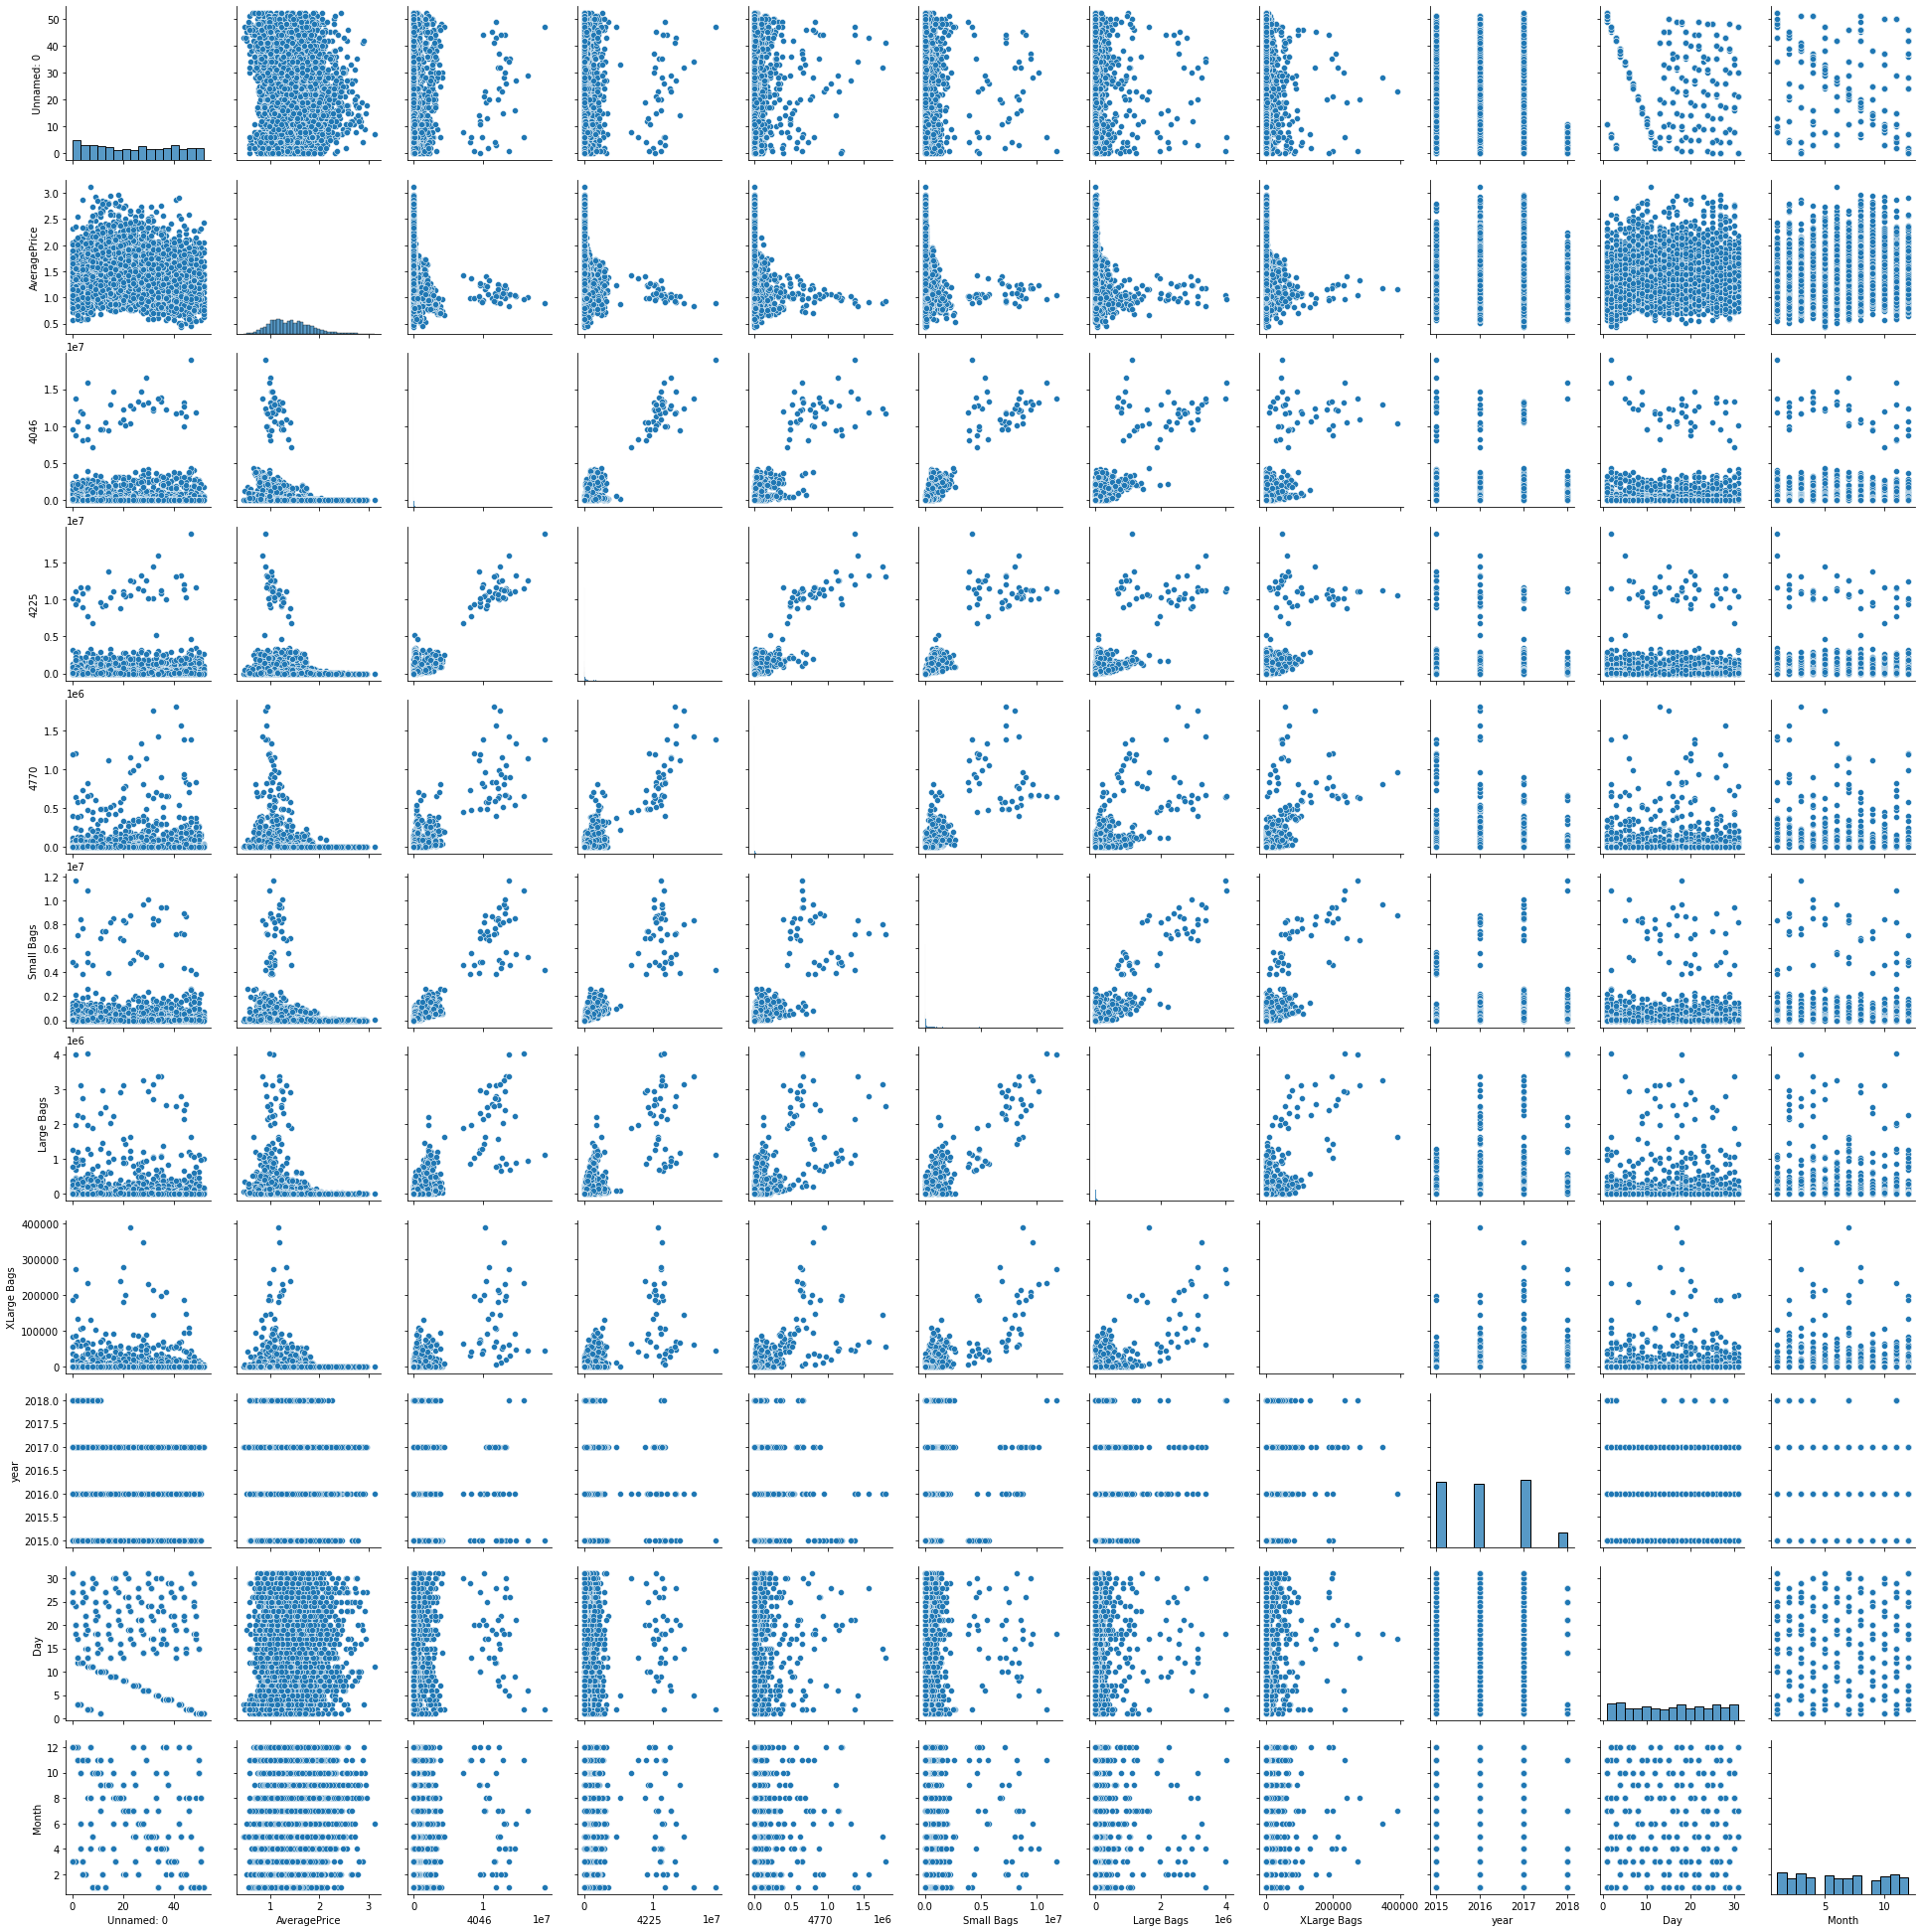

In [60]:
sns.pairplot(rows)

# Checking for the Outliers in the Dataset

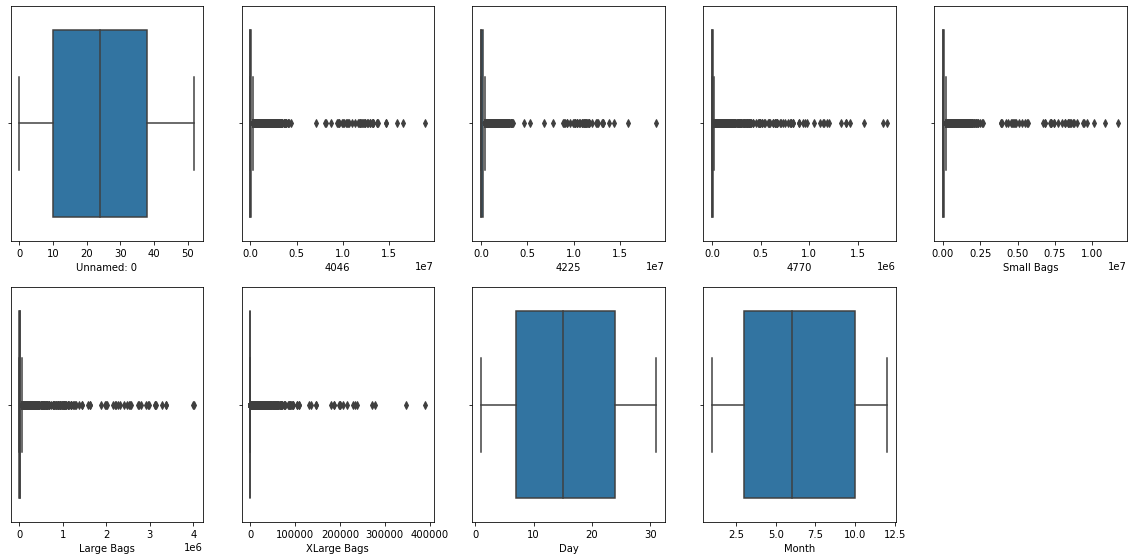

In [61]:
def check_outliers(data_f):
    plt.figure(figsize=(20,25))
    plotnum = 1
    for feature in data_f.drop(columns=['year','type','region','AveragePrice'],axis=1):
        if plotnum <= 16:
            plt.subplot(5,5,plotnum)
            sns.boxplot(data_f[feature])
            plt.xlabel(feature)
        plotnum+=1
    plt.show()
check_outliers(rows)

Each column here has the ouliers except Day and Month

## Checking for skewness

In [62]:
rows.skew()

Unnamed: 0       0.087679
AveragePrice     0.587000
4046             8.509748
4225             8.678164
4770             9.156382
Small Bags       9.256373
Large Bags       9.280535
XLarge Bags     11.638229
year             0.201135
Day              0.013060
Month            0.047526
dtype: float64

## Checking for the correlation

In [63]:
rows.corr()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Day,Month
Unnamed: 0,1.000000,-0.144190,0.005561,0.007444,0.033082,-0.011394,-0.014167,-0.023061,-0.172538,-0.209312,-0.491991
AveragePrice,-0.144190,1.000000,-0.210835,-0.174228,-0.183848,-0.173988,-0.175582,-0.120092,0.078421,0.071363,0.087025
4046,0.005561,-0.210835,1.000000,0.932636,0.841138,0.924263,0.830266,0.699126,-0.008763,0.004962,-0.014647
4225,0.007444,-0.174228,0.932636,1.000000,0.890679,0.916609,0.806334,0.698826,-0.009321,0.005374,-0.015040
4770,0.033082,-0.183848,0.841138,0.890679,1.000000,0.798372,0.694743,0.674764,-0.032687,0.000626,-0.027705
Small Bags,-0.011394,-0.173988,0.924263,0.916609,0.798372,1.000000,0.897111,0.811869,0.059927,0.010065,-0.014060
Large Bags,-0.014167,-0.175582,0.830266,0.806334,0.694743,0.897111,1.000000,0.714555,0.084834,0.002553,-0.022214
XLarge Bags,-0.023061,-0.120092,0.699126,0.698826,0.674764,0.811869,0.714555,1.000000,0.078467,0.010020,0.003978
year,-0.172538,0.078421,-0.008763,-0.009321,-0.032687,0.059927,0.084834,0.078467,1.000000,-0.010584,-0.101177
Day,-0.209312,0.071363,0.004962,0.005374,0.000626,0.010065,0.002553,0.010020,-0.010584,1.000000,-0.038367


<AxesSubplot:>

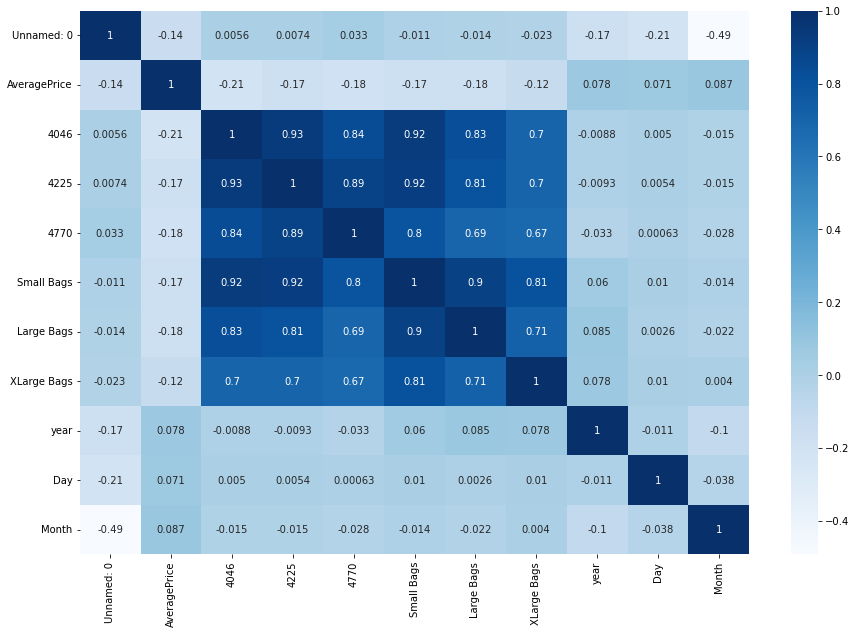

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(rows.corr(), annot=True, cmap='Blues')

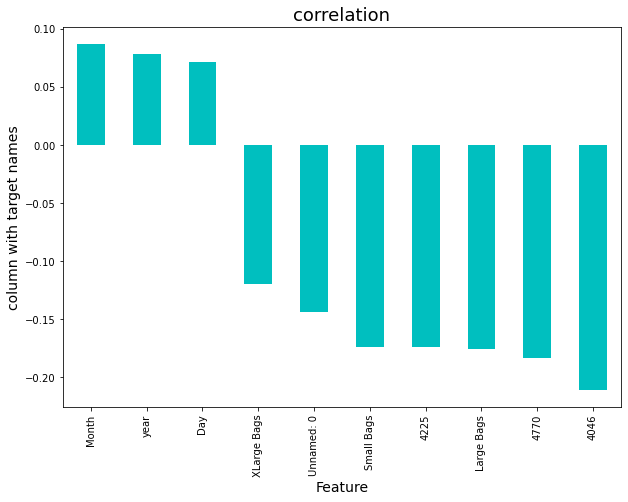

In [65]:
plt.figure(figsize=(10,7))
rows.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

so we can see that - X kargebags ,4225,4770,Large bags,Small bags, 4046 having negative or are in inversly propotional in the Dataset

In [66]:
rows.cov()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Day,Month
Unnamed: 0,243.353262,-0.915704,1.092818e+05,1.365149e+05,5.353530e+04,-1.331491e+05,-5.530489e+04,-6.165824e+03,-2.545292,-29.640598,-27.002092
AveragePrice,-0.915704,0.165731,-1.081141e+05,-8.338167e+04,-7.764036e+03,-5.306121e+04,-1.788711e+04,-8.379329e+02,0.030190,0.263724,0.124643
4046,109281.791918,-108114.123886,1.586630e+12,1.381021e+12,1.099086e+11,8.721468e+11,2.617062e+11,1.509339e+10,-10438.735783,56738.341745,-64911.078531
4225,136514.898595,-83381.674223,1.381021e+12,1.381977e+12,1.086170e+11,8.072179e+11,2.372053e+11,1.408034e+10,-10361.957022,57350.576796,-62206.013408
4770,53535.297743,-7764.035985,1.099086e+11,1.086170e+11,1.076100e+10,6.204233e+10,1.803473e+10,1.199698e+09,-3206.571444,589.461074,-10111.322612
Small Bags,-133149.103260,-53061.213715,8.721468e+11,8.072179e+11,6.204233e+10,5.611936e+11,1.681751e+11,1.042404e+10,42453.134282,68447.955035,-37057.600272
Large Bags,-55304.885686,-17887.109557,2.617062e+11,2.372053e+11,1.803473e+10,1.681751e+11,6.262075e+10,3.064705e+09,20075.327294,5798.649339,-19557.458672
XLarge Bags,-6165.823903,-837.932874,1.509339e+10,1.408034e+10,1.199698e+09,1.042404e+10,3.064705e+09,2.937564e+08,1271.791946,1558.905055,239.893043
year,-2.545292,0.030190,-1.043874e+04,-1.036196e+04,-3.206571e+03,4.245313e+04,2.007533e+04,1.271792e+03,0.894265,-0.090854,-0.336618
Day,-29.640598,0.263724,5.673834e+04,5.735058e+04,5.894611e+02,6.844796e+04,5.798649e+03,1.558905e+03,-0.090854,82.403844,-1.225335


<AxesSubplot:>

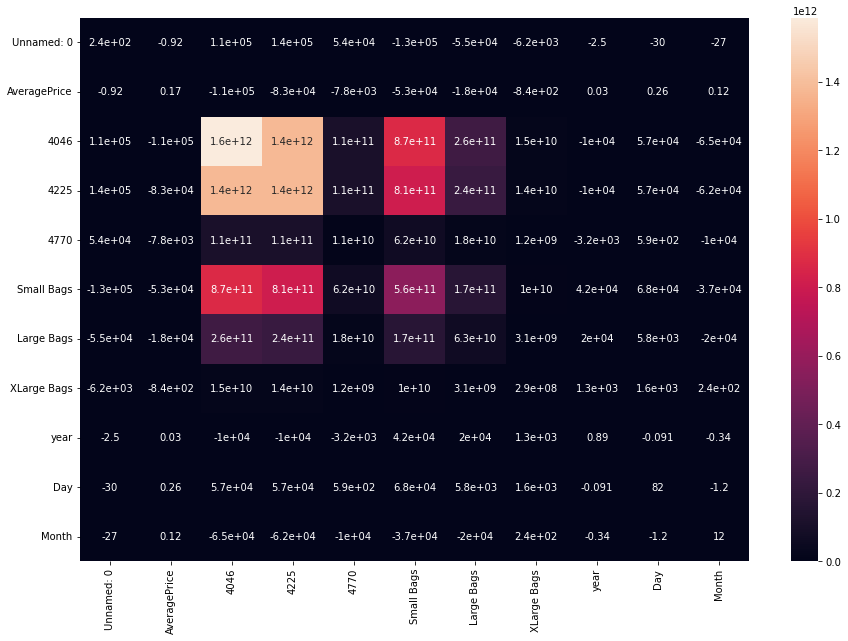

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(rows.cov(), annot=True)

# Data Cleaning and preprocessing

### Encoding the columns

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['type','region']
#
# Encode labels of multiple columns at once
#
rows[cols] = rows[cols].apply(LabelEncoder().fit_transform)

In [69]:
rows.head()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
10452,26,1.62,7894.13,35220.02,4380.25,12921.08,6785.81,0.00,1,2015,25,28,6
5503,43,0.91,11907394.72,13210854.56,1560167.75,7251666.99,2802238.74,69494.92,0,2016,51,28,2
10949,3,1.92,2915.26,13652.88,368.09,3518.24,1532.40,0.00,1,2015,35,12,6
10731,45,1.87,7.88,590.77,0.00,6600.52,0.00,0.00,1,2015,30,15,2
11820,42,1.49,253078.17,327972.28,5658.70,169302.64,27901.26,0.00,1,2015,51,3,8


## Removing outliers using z-score method

In [70]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(rows))

# Creating new dataframe
new_avd=rows[(z<3).all(axis=1)]
new_avd

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
10452,26,1.62,7894.13,35220.02,4380.25,12921.08,6785.81,0.00,1,2015,25,28,6
10949,3,1.92,2915.26,13652.88,368.09,3518.24,1532.40,0.00,1,2015,35,12,6
10731,45,1.87,7.88,590.77,0.00,6600.52,0.00,0.00,1,2015,30,15,2
11820,42,1.49,253078.17,327972.28,5658.70,169302.64,27901.26,0.00,1,2015,51,3,8
7917,22,1.72,115910.95,169760.67,2027.83,112306.79,69630.16,1176.63,0,2017,43,30,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,24,0.98,572059.17,327858.80,2757.68,174975.56,140535.13,1706.27,0,2017,11,16,7
11126,24,1.28,119.94,3413.01,413.27,486.67,2440.29,0.00,1,2015,38,7,12
10986,40,1.80,3811.27,19130.46,22.89,10549.20,730.52,0.00,1,2015,35,22,3
10468,42,1.62,8451.96,27277.29,4616.93,31682.71,1222.85,0.00,1,2015,25,3,8


In [71]:
rows.shape

(4562, 13)

In [72]:
new_avd.shape

(4403, 13)

## Checking the Loss from the Zscore method

In [74]:
# Let's check the the data loss
data_loss = (4562-4440)/4562*100
print('The  Data_loss from Zscore  is :',data_loss)

The  Data_loss from Zscore  is : 2.6742656729504604


This is acceptable  range

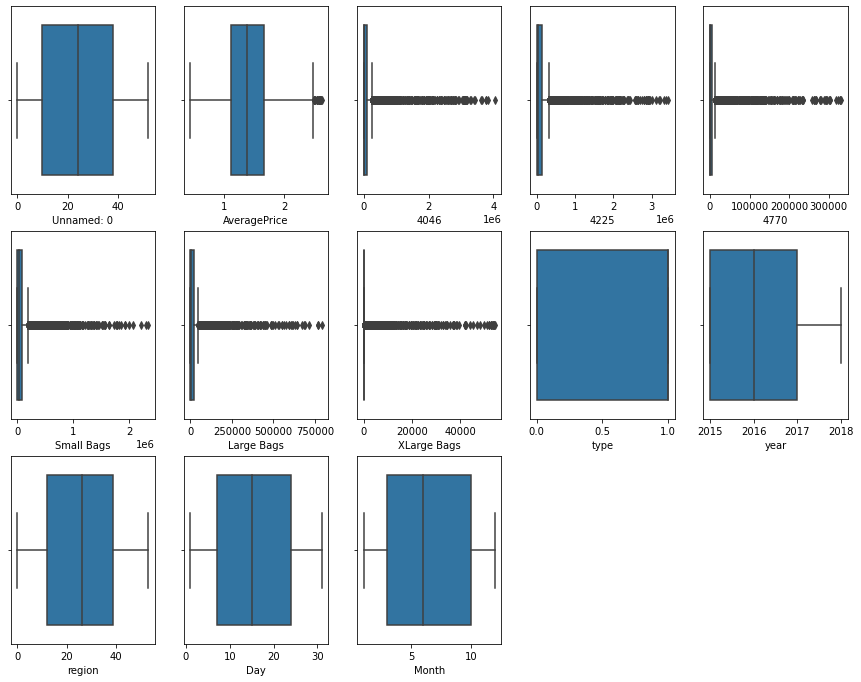

In [75]:
plt.figure(figsize=(15,20),facecolor='white')
plotnum = 1
for feature in new_avd:
    if plotnum <= 16:
        plt.subplot(5,5,plotnum)
        sns.boxplot(new_avd[feature])
        plt.xlabel(feature)
    plotnum+=1
plt.show()

Some outliers has been reduced from dataset

## Dividing the dataset into x and y

In [76]:
x = new_avd.drop(['AveragePrice'], axis=1)
y =new_avd.iloc[:,0]

## Removing the skewness using PowerTransformer

In [77]:
from sklearn.preprocessing  import power_transform
x=power_transform(x,method='yeo-johnson',)

In [78]:
x

array([[ 0.23255571, -0.04486669,  0.17533714, ...,  0.04531792,
         1.29524508, -0.01580563],
       [-1.50617053, -0.35095566, -0.19071299, ...,  0.63889442,
        -0.26625012, -0.01580563],
       [ 1.21841655, -1.84222464, -1.21233901, ...,  0.34904876,
         0.05964855, -1.27902512],
       ...,
       [ 0.97688143, -0.27020737, -0.06378648, ...,  0.63889442,
         0.75317168, -0.9272198 ],
       [ 1.07475258, -0.02328254,  0.07369611, ...,  0.04531792,
        -1.44815535,  0.51797639],
       [ 0.34651122, -1.65254685, -1.01504338, ..., -1.63174093,
        -0.04664758, -0.01580563]])

so now we have transformed the data using the power transformer technique

In [79]:
x =pd.DataFrame(x)

In [80]:
x.skew()

0    -0.255922
1    -0.038692
2    -0.041873
3     0.026427
4    -0.023555
5    -0.112751
6     0.872572
7    -0.055002
8     0.000000
9    -0.254401
10   -0.226927
11   -0.161468
dtype: float64

In [81]:
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.232556,-0.044867,0.175337,0.891504,-0.173627,0.375960,-0.671770,0.972886,-2.419731e-13,0.045318,1.295245,-0.015806
1,-1.506171,-0.350956,-0.190713,0.290983,-0.678083,-0.089298,-0.671770,0.972886,-2.419731e-13,0.638894,-0.266250,-0.015806
2,1.218417,-1.842225,-1.212339,-1.230985,-0.442772,-1.639661,-0.671770,0.972886,-2.419731e-13,0.349049,0.059649,-1.279025
3,1.074753,1.157251,1.163338,0.952471,1.053959,0.882008,-0.671770,0.972886,-2.419731e-13,1.497683,-1.448155,0.517976
4,-0.005358,0.866796,0.851982,0.706861,0.835034,1.246657,1.604561,-1.027869,1.806888e-13,1.079627,1.467801,0.256668
...,...,...,...,...,...,...,...,...,...,...,...,...
4398,0.115386,1.473813,1.163170,0.780799,1.071954,1.548510,1.625583,-1.027869,1.806888e-13,-0.918757,0.163865,0.256668
4399,0.115386,-1.226817,-0.675676,0.319478,-1.323235,0.049300,-0.671770,0.972886,-2.419731e-13,0.807189,-0.869702,1.479171
4400,0.976881,-0.270207,-0.063786,-0.398230,-0.256917,-0.297875,-0.671770,0.972886,-2.419731e-13,0.638894,0.753172,-0.927220
4401,1.074753,-0.023283,0.073696,0.904050,0.216938,-0.154372,-0.671770,0.972886,-2.419731e-13,0.045318,-1.448155,0.517976


#### Once again checking for skewness

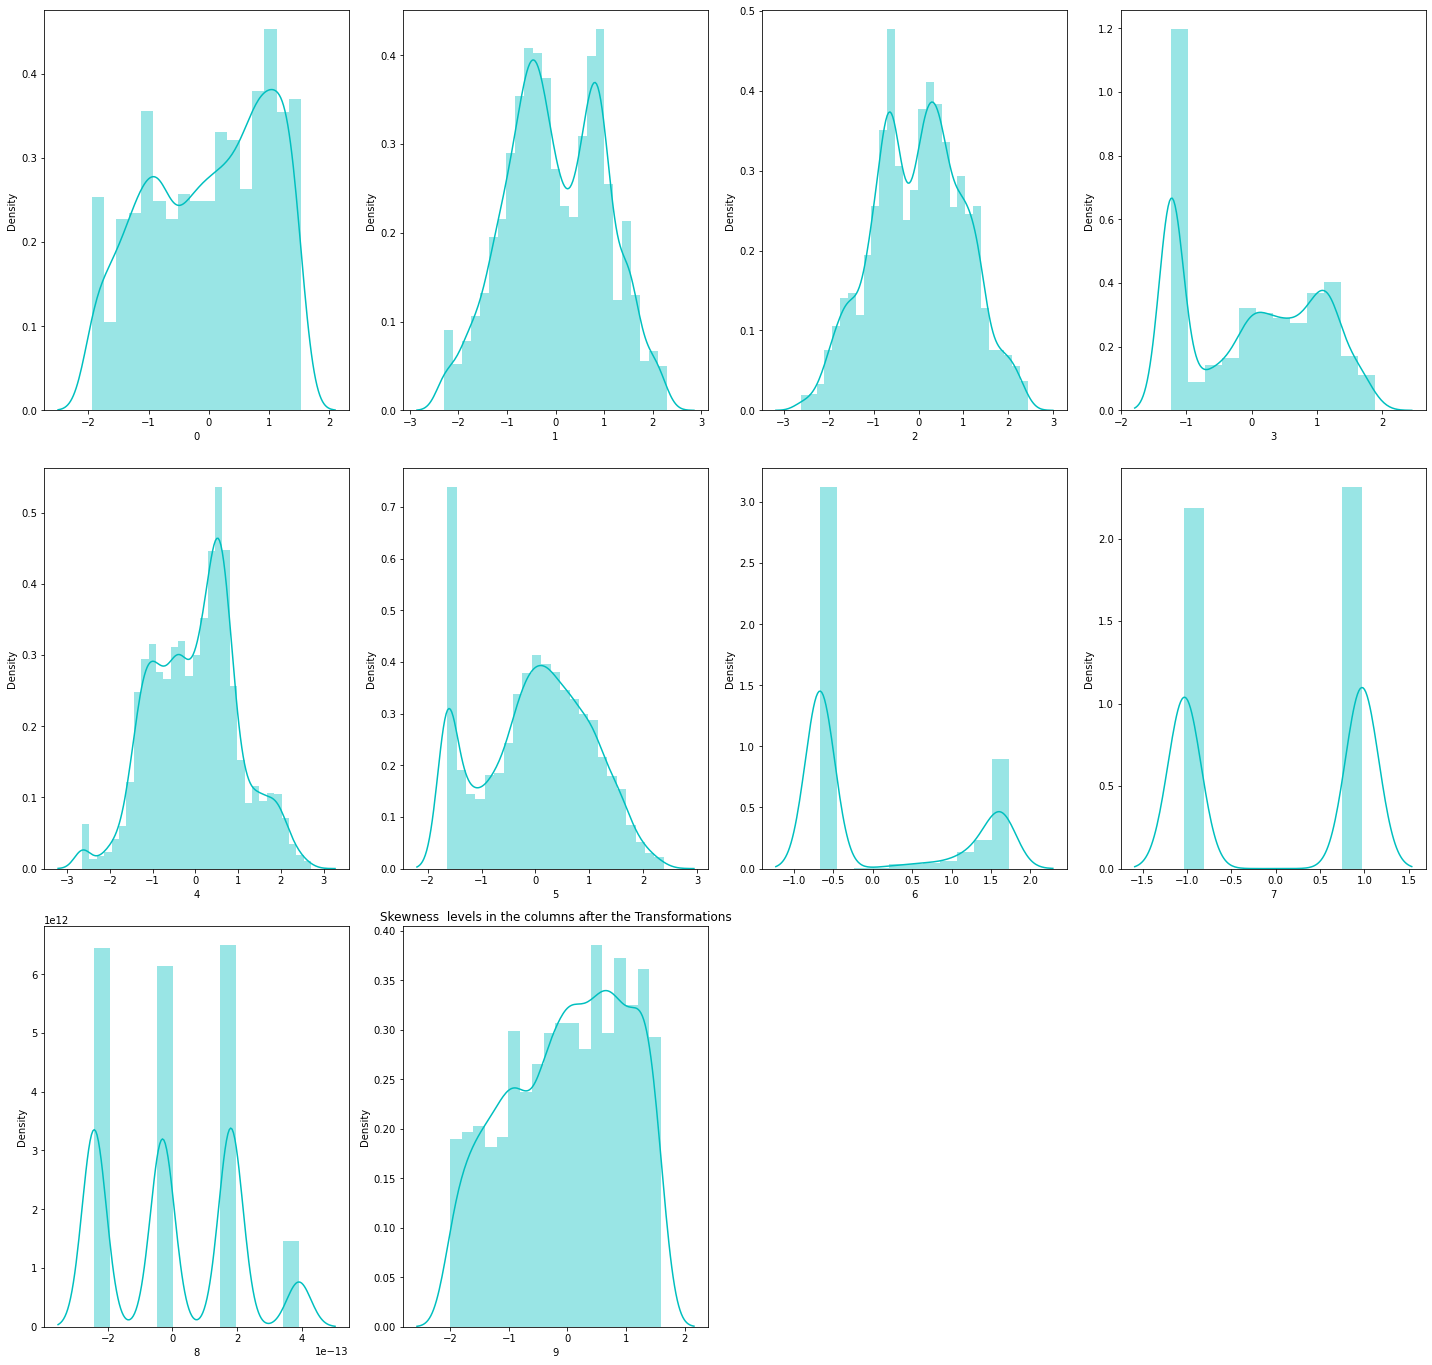

In [83]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum = 1
for i in x[[0,1,2,3,4,5,6,7,8,9,10]]:
    if plotnum <=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(x[i], color='c')
        plt.xlabel(i,fontsize=10)
    plotnum+=1
plt.title('Skewness  levels in the columns after the Transformations')
plt.tight_layout()

so now we can see that the data is almost normally distributed and the skewness is being removed by the transformer

In [84]:
new_avd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4403 entries, 10452 to 9310
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4403 non-null   int64  
 1   AveragePrice  4403 non-null   float64
 2   4046          4403 non-null   float64
 3   4225          4403 non-null   float64
 4   4770          4403 non-null   float64
 5   Small Bags    4403 non-null   float64
 6   Large Bags    4403 non-null   float64
 7   XLarge Bags   4403 non-null   float64
 8   type          4403 non-null   int32  
 9   year          4403 non-null   int64  
 10  region        4403 non-null   int32  
 11  Day           4403 non-null   int64  
 12  Month         4403 non-null   int64  
dtypes: float64(7), int32(2), int64(4)
memory usage: 447.2 KB


### Scaling the columns using the Standard Scaler

In [85]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_x = scalar.fit_transform(x)
scaled_x

array([[ 0.23255571, -0.04486669,  0.17533714, ...,  0.04531792,
         1.29524508, -0.01580563],
       [-1.50617053, -0.35095566, -0.19071299, ...,  0.63889442,
        -0.26625012, -0.01580563],
       [ 1.21841655, -1.84222464, -1.21233901, ...,  0.34904876,
         0.05964855, -1.27902512],
       ...,
       [ 0.97688143, -0.27020737, -0.06378648, ...,  0.63889442,
         0.75317168, -0.9272198 ],
       [ 1.07475258, -0.02328254,  0.07369611, ...,  0.04531792,
        -1.44815535,  0.51797639],
       [ 0.34651122, -1.65254685, -1.01504338, ..., -1.63174093,
        -0.04664758, -0.01580563]])

### Using Variation inflation factor for checking multicollinearity

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_VIF(scaled_x):
    #Calculating VIF
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
    return vif
vif = calc_VIF(scaled_x)

In [87]:
vif

,Features,VIF
0,0,1.560357
1,1,3.781215
2,2,4.294074
3,3,3.853912
4,4,4.182433
5,5,1.877215
6,6,2.041087
7,7,3.419595
8,8,1.442436
9,9,1.089078


as here we can see that there are some high Vif values of the columns like 0 and 1 but still we are not removing it for now as it may be some important feature and may affect the predictive model

In [88]:
x= scaled_x

### Feature Engineering

In [90]:
from sklearn.feature_selection import VarianceThreshold
# we are  importing  the  sklearn's  feature  selection technique  here  to extract  some imp  feature   from  the  model
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(x)

VarianceThreshold()

In [91]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [92]:
x = pd.DataFrame(x)

In [93]:
x.columns[var_thres.get_support()]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [94]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_thres.get_support()]]
print('One column is  to be  removed ---',len(cons_columns))

One column is  to be  removed --- 0


So according to the Variance Threshold method we have to remove the 7th column

In [95]:
# K BEST
from sklearn.feature_selection import SelectKBest, f_classif

In [96]:
bestfeat = SelectKBest(score_func = f_classif, k =10)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [97]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10,'Score'))

    Feature       Score
0         0         inf
10       10  170.324094
11       11  111.672481
8         8    6.215385
6         6    2.712484
3         3    1.223534
5         5    1.002351
2         2    0.981942
4         4    0.894461
1         1    0.770170


selecting best features based on score,
Dropping the least scores from the datase

In [98]:
x_best = x.drop(columns=[8,9])

In [99]:
x_best_scaled = scalar.fit_transform(x_best)

In [100]:
x_best_scaled

array([[ 0.23255571, -0.04486669,  0.17533714, ...,  0.97288618,
         1.29524508, -0.01580563],
       [-1.50617053, -0.35095566, -0.19071299, ...,  0.97288618,
        -0.26625012, -0.01580563],
       [ 1.21841655, -1.84222464, -1.21233901, ...,  0.97288618,
         0.05964855, -1.27902512],
       ...,
       [ 0.97688143, -0.27020737, -0.06378648, ...,  0.97288618,
         0.75317168, -0.9272198 ],
       [ 1.07475258, -0.02328254,  0.07369611, ...,  0.97288618,
        -1.44815535,  0.51797639],
       [ 0.34651122, -1.65254685, -1.01504338, ...,  0.97288618,
        -0.04664758, -0.01580563]])

### Model devlopment for prediction

As the output data is continuous we are going with regression models

In [101]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import joblib
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

### Finding the best Random state for the model

In [102]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_best_scaled,y,test_size = .33, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 1.0 on random_state: 54


### Training all the Models in same list

With K fold Cross validation

In [104]:
models= [RandomForestRegressor(n_estimators=500,random_state=54, max_depth=3,),XGBRegressor(),SVR(kernel='linear'),KNeighborsRegressor(),SGDRegressor(),GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,subsample=0.1, random_state=54)]
x_train,x_test,y_train,y_test = train_test_split(x_best_scaled,y,test_size=.33,random_state=54)

def compare_models():
    for model in models:
        
        model.fit(x_train,y_train)
        model_predict = model.predict(x_test)
        score_r2 = r2_score(y_test, model_predict)
        mean_error = mean_squared_error(y_test, model_predict)
        crossval_score = cross_val_score(model,x_best_scaled,y,cv=6).mean()
        print("R2 score of the model : ",model,"=",round(score_r2*100,1),"%")
        print("mean squared error for model : ",model,"=",mean_error)
        print("cross val score for model : ",model, "=",crossval_score)
        print('_______________________________________________')
compare_models()

R2 score of the model :  RandomForestRegressor(max_depth=3, n_estimators=500, random_state=54) = 98.8 %
mean squared error for model :  RandomForestRegressor(max_depth=3, n_estimators=500, random_state=54) = 3.0028855077348826
cross val score for model :  RandomForestRegressor(max_depth=3, n_estimators=500, random_state=54) = 0.9881485350495942
_______________________________________________
R2 score of the model :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
    

as in the above model biuilding and the cross validation of the each model in the pipeline of the lists we can see that the cross val score from the Gradient boosting regressor is the highest & the best among all which is around to 99.9%

### HyperParameter Tuning

In [105]:
parameters = {'n_estimators':[30,60,80,100,500],
                   'max_depth':[2,3,4],
                   'alpha':[0,0.1,0.5,0.9],
                   'subsample':[0.01,0.1,0.2,0.5,1],
                   'n_iter_no_change':[20,45,50,100],
                   'criterion':['mse','squared_error'],
                    'learning_rate':[0.1,0.01,0.001,1]
    }
grid_classifier = GridSearchCV(GradientBoostingRegressor(),parameters,cv=7,n_jobs=-1,verbose=1)
grid_classifier.fit(x_train,y_train)
print(f"The best parameters are {grid_classifier.best_params_}")
print(f"The best Score is {grid_classifier.best_score_}")

Fitting 7 folds for each of 9600 candidates, totalling 67200 fits
The best parameters are {'alpha': 0.1, 'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'n_iter_no_change': 100, 'subsample': 0.5}
The best Score is 0.9999999999999998


In [106]:
Best_mod1 = GradientBoostingRegressor(n_estimators=500,criterion='mse',max_depth=4,learning_rate=0.1,n_iter_no_change=100, subsample=0.5, alpha=0.1)
Best_mod1.fit(x_train,y_train)
Gbpred = Best_mod1.predict(x_test)
acc = r2_score(y_test,Gbpred)
print(acc*100)

99.99999999999997


#### The accuracy score from the Hypertuned model is 99.99% which says that it is a very good model for prediction

### saving the Model

In [107]:
import joblib
joblib.dump(Best_mod1,"Avacado_model.pkl")

['Avacado_model.pkl']

### Prediction by the model

In [108]:
a = np.array(y_test)
predicted = np.array(Best_mod1.predict(x_test))
df_ava = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_ava

,orginal,predicted
0,46,46.0
1,18,18.0
2,28,28.0
3,2,2.0
4,4,4.0
...,...,...
1448,34,34.0
1449,45,45.0
1450,19,19.0
1451,8,8.0


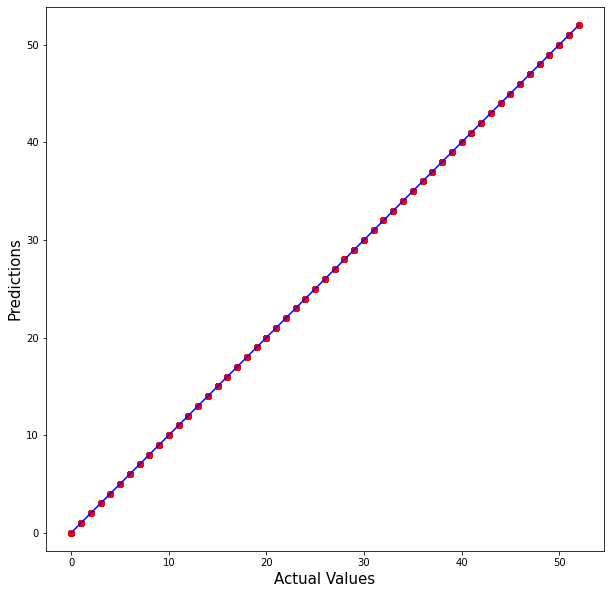

In [109]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Gbpred, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(Gbpred), max(y_test))
p2 = min(min(Gbpred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Original vs predicted  graph')

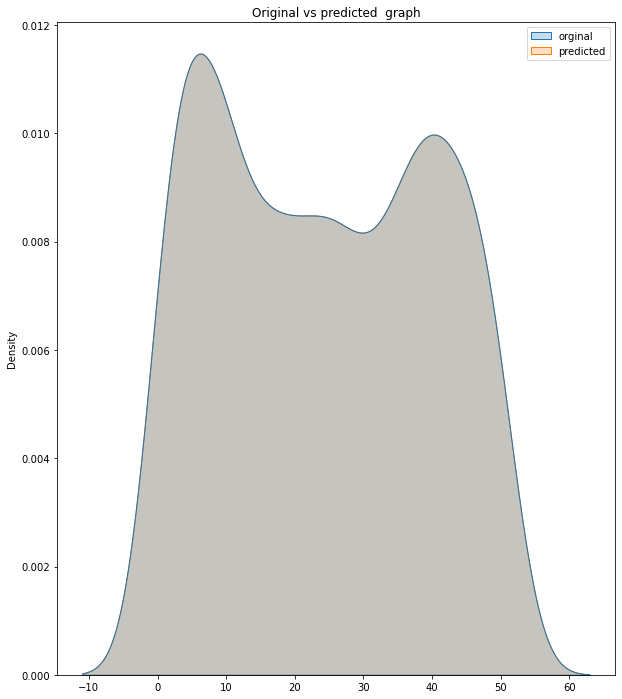

In [110]:
plt.figure(figsize=(10,12))
sns.kdeplot(data=df_ava,gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

So we have a very good Model